In [1]:
import numpy as np

from mockfactory import Catalog
from cosmoprimo.fiducial import DESI
from pycorr import TwoPointCorrelationFunction, setup_logging

# How to run 2pt measurements?

In [2]:
setup_logging()  # for logging messages
cosmo = DESI()  # fiducial cosmology

corrs = []

from pathlib import Path
catalog_dir = Path('/n/netscratch/eisenstein_lab/Lab/cristhian/DESI/dr1_catalogs/')

In [3]:
# ========== USER CONFIGURATION ==========
zmin = 0.4
zmax = 0.41
name = '2PCF'           # Output name tag
tracer = 'LRG'          # e.g., LRG, ELG, QSO
extension = 'NGC'       # 'NGC' or 'SGC'
nthreads = 64           # adjust for your machine
# ========================================

# Create output filename
output_dir = Path("/n/home12/cgarciaquintero/DESI/tutorial/day1_measurements/correlation_functions/")  # customize path if needed
output_dir.mkdir(exist_ok=True)
output_file = output_dir / f'{name}_{tracer}_{extension}_z{zmin:.2f}-{zmax:.2f}.npy'

# Load catalogs
catalog_dir = Path("/n/netscratch/eisenstein_lab/Lab/cristhian/DESI/dr1_catalogs/")  # <-- CHANGE THIS TO YOUR BASE PATH

data_fn = catalog_dir / f'{tracer}_{extension}_clustering.dat.fits'
randoms_fn = catalog_dir / f'{tracer}_{extension}_0_clustering.ran.fits'

data = Catalog.read(data_fn)
randoms = Catalog.read(randoms_fn)

# Cosmology for comoving distance
cosmo = DESI()

def get_positions_weights(catalog):
    mask = (catalog['Z'] > zmin) & (catalog['Z'] < zmax) # define redshift bin
    cat = catalog[mask] 
    ra = cat['RA']
    dec = cat['DEC']
    dist = cosmo.comoving_radial_distance(cat['Z']) # convert redshift to distances
    weights = cat['WEIGHT'] * cat['WEIGHT_FKP'] # apply weights
    return [ra, dec, dist], weights

data_positions, data_weights = get_positions_weights(data)
randoms_positions, randoms_weights = get_positions_weights(randoms)

print(f"[{extension}] # Galaxies: {len(data_weights)}, # Randoms: {len(randoms_weights)}")

# Compute correlation function
corr = TwoPointCorrelationFunction(
    mode='smu', # mode (s,mu)
    edges=(np.linspace(0., 200., 201), np.linspace(-1., 1., 201)), # bins
    data_positions1=data_positions, data_weights1=data_weights,
    randoms_positions1=randoms_positions, randoms_weights1=randoms_weights,
    position_type='rdd', # RA, DEC in degrees
    nthreads=nthreads, 
    dtype='f8' #precision settings
)

# Save result
corr.save(output_file)
print(f"Saved correlation function to: {output_file}")

[000419.90]  11-02 22:25  FitsFile                     INFO     Reading /n/netscratch/eisenstein_lab/Lab/cristhian/DESI/dr1_catalogs/LRG_NGC_clustering.dat.fits.
[000419.96]  11-02 22:25  FitsFile                     INFO     Reading /n/netscratch/eisenstein_lab/Lab/cristhian/DESI/dr1_catalogs/LRG_NGC_0_clustering.ran.fits.
[NGC] # Galaxies: 12650, # Randoms: 81264
[000437.74]  11-02 22:25  TwoPointCorrelationFunction  INFO     Using estimator <class 'pycorr.twopoint_estimator.LandySzalayTwoPointEstimator'>.
[000437.75]  11-02 22:25  TwoPointCorrelationFunction  INFO     Running auto-correlation.
[000437.75]  11-02 22:25  TwoPointCorrelationFunction  INFO     Computing two-point counts D1D2.
[000443.53]  11-02 22:25  TwoPointCorrelationFunction  INFO     Computing two-point counts D1R2.
[000444.78]  11-02 22:25  TwoPointCorrelationFunction  INFO     Computing two-point counts R1R2.
[000447.83]  11-02 22:25  TwoPointCorrelationFunction  INFO     Correlation function computed in elapsed 

# Plotting the correlation function measurements

Quickly plot the correlation function

[003912.37]  10-27 11:31  TwoPointEstimator            INFO     Loading /n/home12/cgarciaquintero/DESI/tutorial/day1_measurements/correlation_functions/2PCF_LRG_SGC_z0.40-0.60.npy.


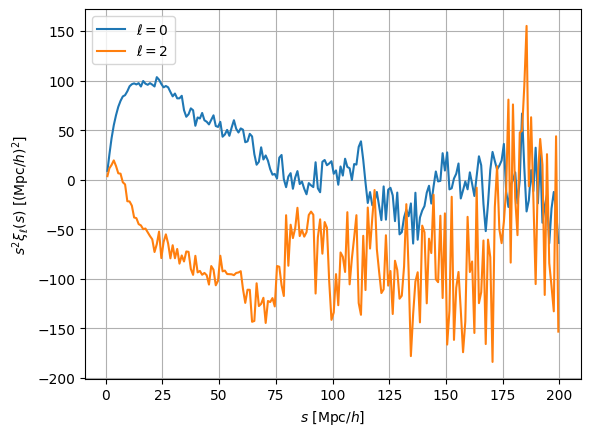

In [29]:
corr_file = '/n/home12/cgarciaquintero/DESI/tutorial/day1_measurements/correlation_functions/2PCF_LRG_SGC_z0.40-0.60.npy'
corr = TwoPointCorrelationFunction.load(corr_file)
corr.plot(ells=(0,2), show=True);

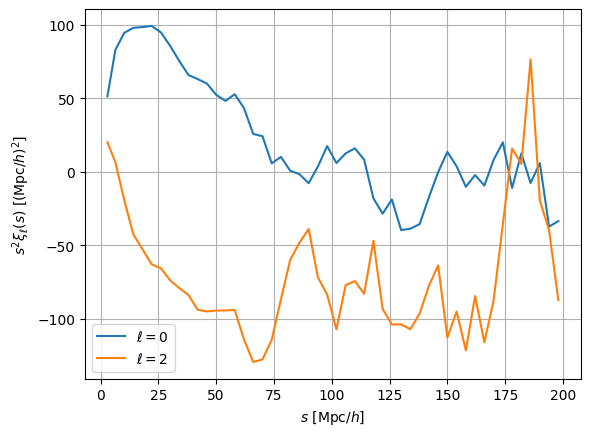

In [30]:
corr.copy().select((0., 200., 4.)).plot(ells=(0, 2), show=True);

Concatenate the correlation function measurements

[000779.84]  11-02 22:31  TwoPointEstimator            INFO     Loading /n/home12/cgarciaquintero/DESI/tutorial/day1_measurements/correlation_functions/2PCF_LRG_SGC_z0.40-0.60.npy.
[000779.85]  11-02 22:31  TwoPointEstimator            INFO     Loading /n/home12/cgarciaquintero/DESI/tutorial/day1_measurements/correlation_functions/2PCF_LRG_NGC_z0.40-0.60.npy.


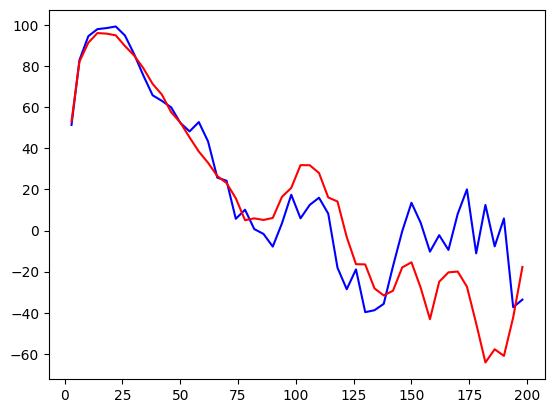

In [13]:
corr_file1 = '/n/home12/cgarciaquintero/DESI/tutorial/day1_measurements/correlation_functions/2PCF_LRG_SGC_z0.40-0.60.npy'
corr1 = TwoPointCorrelationFunction.load(corr_file1)
s_SGC, xi0_SGC = corr1.copy().select((0., 200., 4.))(ell=0, return_sep=True)

corr_file2 = '/n/home12/cgarciaquintero/DESI/tutorial/day1_measurements/correlation_functions/2PCF_LRG_NGC_z0.40-0.60.npy'
corr2 = TwoPointCorrelationFunction.load(corr_file2)
s_NGC, xi0_NGC = corr2.copy().select((0., 200., 4.))(ell=0, return_sep=True)

import matplotlib.pyplot as plt
plt.plot(s_SGC, s_SGC**2*xi0_SGC, label=f'SGC', color='b')
plt.plot(s_NGC, s_NGC**2*xi0_NGC, label=f'NGC', color='r')

[003851.53]  10-27 11:30  TwoPointEstimator            INFO     Loading /n/home12/cgarciaquintero/DESI/tutorial/day1_measurements/correlation_functions/2PCF_LRG_NGC_z0.40-0.60.npy.
[003851.54]  10-27 11:30  TwoPointEstimator            INFO     Loading /n/home12/cgarciaquintero/DESI/tutorial/day1_measurements/correlation_functions/2PCF_LRG_SGC_z0.40-0.60.npy.


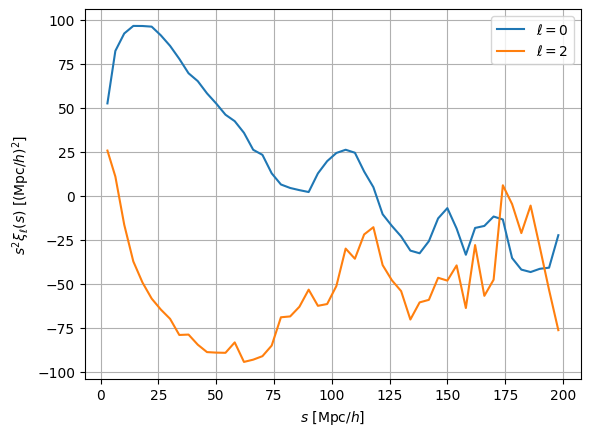

In [28]:
base_path = '/n/home12/cgarciaquintero/DESI/tutorial/day1_measurements/correlation_functions/'
fname_ngc = '2PCF_LRG_NGC_z0.40-0.60.npy'
fname_sgc = '2PCF_LRG_SGC_z0.40-0.60.npy'
corr_ngc = TwoPointCorrelationFunction.load(base_path+fname_ngc)
corr_sgc = TwoPointCorrelationFunction.load(base_path+fname_sgc)
    
# Normalize and sum (equivalent to total estimator)
corr = sum(c.normalize() for c in [corr_ngc, corr_sgc])
corr.copy().select((0., 200., 4.)).plot(ells=(0, 2), show=True);

# Effect of galaxy sample size on 2pt measurements

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from pycorr import TwoPointCorrelationFunction

# ========== Configuration ==========
base_path = '/n/home12/cgarciaquintero/DESI/tutorial/day1_measurements/correlation_functions/'
ells = (0, 2)

# Redshift bins
redshift_bins = {
    'z=0.40–0.41': 'z0.40-0.41',
    'z=0.40–0.45': 'z0.40-0.45',
    'z=0.40–0.50': 'z0.40-0.50',
    'z=0.40–0.60': 'z0.40-0.60',
}

# ========== Load and combine NGC + SGC ==========
xiell = {}

for label, correlation in redshift_bins.items():
    # Load NGC and SGC correlation function objects
    fname_ngc = f'{base_path}2PCF_LRG_NGC_{correlation}.npy'
    fname_sgc = f'{base_path}2PCF_LRG_SGC_{correlation}.npy'
    corr_ngc = TwoPointCorrelationFunction.load(fname_ngc)
    corr_sgc = TwoPointCorrelationFunction.load(fname_sgc)
    
    # Normalize and sum (equivalent to total estimator)
    corr = sum(c.normalize() for c in [corr_ngc, corr_sgc])

    # Store s and multipoles
    xiell[label] = {}
    for ell in ells:
        s, xi = corr(ell=ell, return_sep=True)
        xiell[label][f'ell{ell}'] = xi
        xiell[label]['s'] = s  # set only once

[000881.70]  11-02 22:33  TwoPointEstimator            INFO     Loading /n/home12/cgarciaquintero/DESI/tutorial/day1_measurements/correlation_functions/2PCF_LRG_NGC_z0.40-0.41.npy.
[000881.72]  11-02 22:33  TwoPointEstimator            INFO     Loading /n/home12/cgarciaquintero/DESI/tutorial/day1_measurements/correlation_functions/2PCF_LRG_SGC_z0.40-0.41.npy.
[000881.89]  11-02 22:33  TwoPointEstimator            INFO     Loading /n/home12/cgarciaquintero/DESI/tutorial/day1_measurements/correlation_functions/2PCF_LRG_NGC_z0.40-0.45.npy.
[000882.03]  11-02 22:33  TwoPointEstimator            INFO     Loading /n/home12/cgarciaquintero/DESI/tutorial/day1_measurements/correlation_functions/2PCF_LRG_SGC_z0.40-0.45.npy.
[000882.23]  11-02 22:33  TwoPointEstimator            INFO     Loading /n/home12/cgarciaquintero/DESI/tutorial/day1_measurements/correlation_functions/2PCF_LRG_NGC_z0.40-0.50.npy.
[000882.49]  11-02 22:33  TwoPointEstimator            INFO     Loading /n/home12/cgarciaquinte

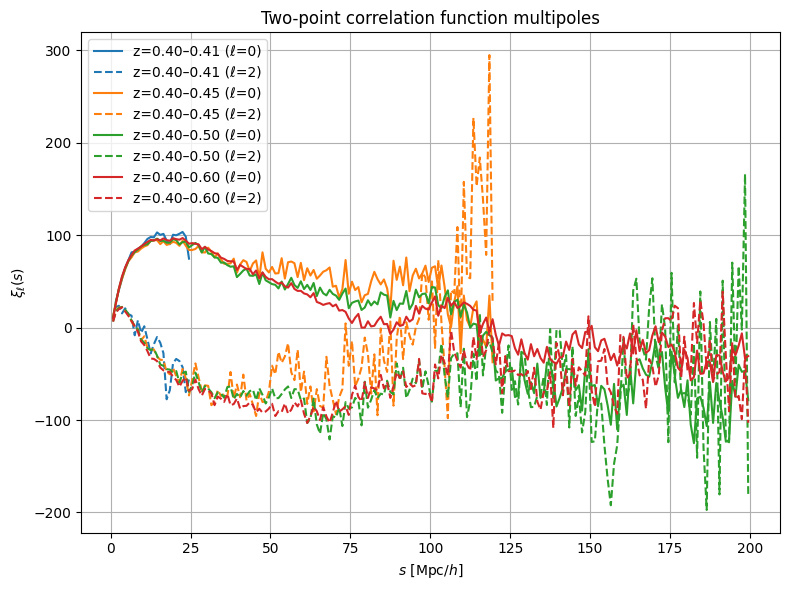

In [32]:
# Plot
fig, ax = plt.subplots(figsize=(8, 6))
colors = ['C0', 'C1', 'C2', 'C3']

for i, (label, data) in enumerate(xiell.items()):
    #if i>3:
     #   break
    s = data['s']
    ax.plot(s, s**2*data['ell0'], label=f'{label} (ℓ=0)', color=colors[i], linestyle='-')
    ax.plot(s, s**2*data['ell2'], label=f'{label} (ℓ=2)', color=colors[i], linestyle='--')

ax.set_xlabel(r'$s\ [\mathrm{Mpc}/h]$')
ax.set_ylabel(r'$\xi_\ell(s)$')
ax.set_title('Two-point correlation function multipoles')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

# Reconstruction

In [6]:
def compute_reconstruction(tracer='LRG', zrange=(0.4, 1.1), region='NGC'):
    # Run reconstruction
    from pathlib import Path
    import numpy as np
    from mockfactory import Catalog
    from pyrecon import MultiGridReconstruction, IterativeFFTReconstruction, IterativeFFTParticleReconstruction, setup_logging
    from cosmoprimo.utils import DistanceToRedshift
    from cosmoprimo.fiducial import DESI

    setup_logging()

    # Path to input catalogs
    catalog_dir = Path('/n/netscratch/eisenstein_lab/Lab/cristhian/DESI/dr1_catalogs/')
    catalog_recon_dir = Path('/n/home12/cgarciaquintero/DESI/tutorial/own_reconstruction/recon_recsym/')
    data_fn = catalog_dir / f'{tracer}_{region}_clustering.dat.fits'
    randoms_fn = catalog_dir / f'{tracer}_{region}_0_clustering.ran.fits'
    # Output reconstructed catalogs
    data_recon_fn = catalog_recon_dir / f'{tracer}_{region}_clustering.dat.fits'
    randoms_recon_fn = catalog_recon_dir / f'{tracer}_{region}_0_clustering.ran.fits'

    def get_positions_weights(catalog):
        # Return effective redshift, [ra, dec, distance], weight
        catalog = catalog[(catalog['Z'] > zrange[0]) & (catalog['Z'] < zrange[1])]
        zeff = (catalog['Z'] * catalog['WEIGHT']).csum() / catalog['WEIGHT'].csum()
        return zeff, [catalog['RA'], catalog['DEC'], cosmo.comoving_radial_distance(catalog['Z'])], catalog['WEIGHT']

    # DESI fiducial cosmology: ~ Planck2018
    cosmo = DESI()
    data = Catalog.read(data_fn)
    randoms = Catalog.read(randoms_fn)
    # Compute positions / weights
    _, data_positions, data_weights = get_positions_weights(data)
    zeff, randoms_positions, randoms_weights = get_positions_weights(randoms)

    # Fiducial growth rate
    f = cosmo.growth_rate(zeff)
    # Fiducial galaxy bias
    if tracer.startswith('BGS'): bias = 1.5
    elif tracer.startswith('LRG+ELG'): bias = 1.6
    elif tracer.startswith('LRG'): bias = 2.0
    elif tracer.startswith('ELG'): bias = 1.2
    elif tracer.startswith('QSO'): bias = 2.1
    # Smoothing radius, Gaussian kernel to smooth the galaxy density field
    smoothing_radius = 30 if 'QSO' in tracer else 15.
    # Use float64
    dtype = 'f8'

    # Run reconstruction:
    # - paint data, randoms on meshes, take delta ~ mesh(data) / mesh(randoms) - 1 smoothed by Gaussian kernel
    # - solve Zeldovich displacements: various algorithms, MultiGridReconstruction, IterativeFFTReconstruction, IterativeFFTParticleReconstruction
    # - MultiGridReconstruction and IterativeFFTReconstruction very close, IterativeFFTReconstruction is faster
    recon = IterativeFFTReconstruction(f=f, bias=bias, positions=data_positions, los='local', cellsize=6., boxpad=1.2, position_type='rdd', dtype=dtype, data_positions=data_positions, data_weights=data_weights, randoms_positions=randoms_positions, randoms_weights=randoms_weights, smoothing_radius=smoothing_radius, mpiroot=None)
    # Read shift positions by the opposite of the Zeldovich + RSD displacement
    # data_positions_recon = data_positions - zeldovich_and_rsd_displacement
    data_positions_recon = recon.read_shifted_positions(data_positions, dtype=dtype)
    distance_to_redshift = DistanceToRedshift(cosmo.comoving_radial_distance)
    data['RA'], data['DEC'], data['Z'] = data_positions_recon[:2] + [distance_to_redshift(data_positions_recon[2])]
    # Write to disk
    data.write(data_recon_fn)
    # recsym: same for randoms
    # (reciso: randoms only shifted by Zeldovich displacements (no RSD))
    randoms_positions_recon = recon.read_shifted_positions(randoms_positions, dtype=dtype)
    randoms['RA'], randoms['DEC'], randoms['Z'] = randoms_positions_recon[:2] + [distance_to_redshift(randoms_positions_recon[2])]
    # Write to disk
    randoms.write(randoms_recon_fn)

In [ ]:
compute_reconstruction(tracer='BGS_BRIGHT-21.5', zrange=(0.1, 0.4), region='SGC')

[000000.05]  10-30 23:19  FitsFile                     INFO     Reading /n/netscratch/eisenstein_lab/Lab/cristhian/DESI/dr1_catalogs/BGS_BRIGHT-21.5_SGC_clustering.dat.fits.
[000000.06]  10-30 23:19  FitsFile                     INFO     Reading /n/netscratch/eisenstein_lab/Lab/cristhian/DESI/dr1_catalogs/BGS_BRIGHT-21.5_SGC_0_clustering.ran.fits.


# POST-RECON measurements

Visualizing reconstruction

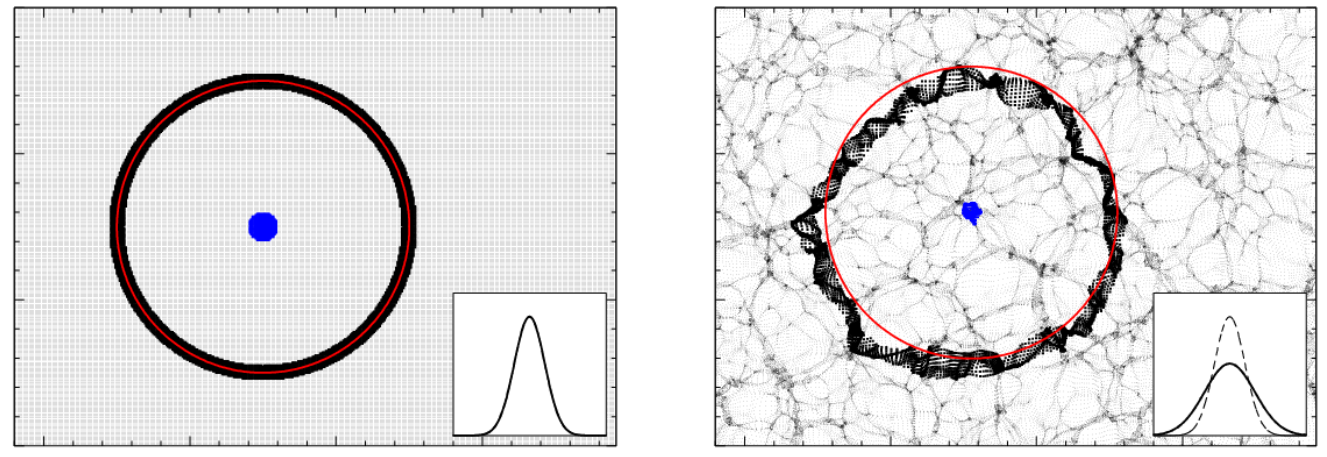

In [39]:
from IPython.display import Image
Image(filename='reconstruction_1.png')

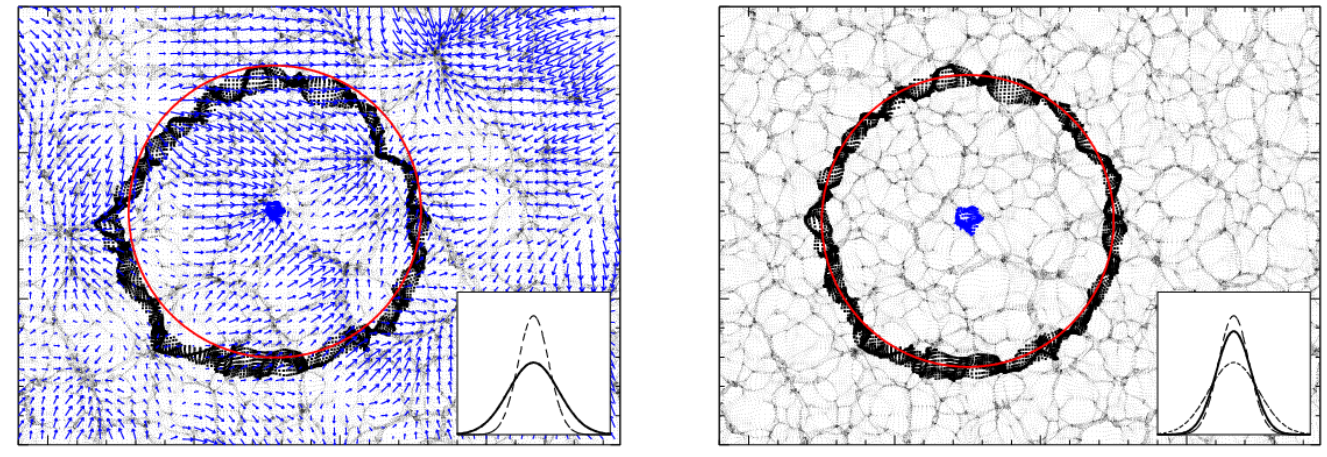

In [40]:
Image(filename='reconstruction_2.png')

Calculating reconstruction

In [6]:
# ========== USER CONFIGURATION ==========
zmin = 0.4
zmax = 0.6
name = '2PCF_recon'           # Output name tag
tracer = 'LRG'          # e.g., LRG, ELG, QSO
extension = 'NGC'       # 'NGC' or 'SGC'
nthreads = 64           # adjust for your machine
# ========================================

def corr_fn(tracer, zrange, extension, name):
    output_dir = Path("/n/home12/cgarciaquintero/DESI/tutorial/day1_measurements/correlation_functions/")
    output_dir.mkdir(exist_ok=True)
    return output_dir / f'{name}_{tracer}_{extension}_z{zrange[0]:.2f}-{zrange[1]:.2f}.npy'

def compute_correlation_function(recon=True, gpu=False):

    from pathlib import Path
    import numpy as np
    from mockfactory import Catalog
    from cosmoprimo.fiducial import DESI
    from pycorr import TwoPointCorrelationFunction, setup_logging

    setup_logging()
    cosmo = DESI()
    zrange = (zmin, zmax)

    def compute_zeff(z1, weights1):
        zstep = 0.01
        zbins = np.arange(zrange[0], zrange[1] + zstep / 2., zstep)
        dbins = cosmo.comoving_radial_distance(zbins)
        hist1 = np.histogram(z1, weights=weights1, density=False, bins=zbins)[0]
        zhist1 = np.histogram(z1, weights=z1 * weights1, density=False, bins=zbins)[0]
        z = zhist1 / hist1
        z[np.isnan(z)] = 0.
        dv = dbins[1:]**3 - dbins[:-1]**3
        return np.sum(hist1**2 / dv * z) / np.sum(hist1**2 / dv)

    def get_positions_weights(catalog):
        catalog = catalog[(catalog['Z'] > zrange[0]) & (catalog['Z'] < zrange[1])]
        weight = catalog['WEIGHT'] * catalog['WEIGHT_FKP']
        zeff = compute_zeff(catalog['Z'], weight)
        return zeff, [catalog['RA'], catalog['DEC'], cosmo.comoving_radial_distance(catalog['Z'])], weight

    # Input paths
    catalog_dir = Path('/n/netscratch/eisenstein_lab/Lab/cristhian/DESI/dr1_catalogs/')
    catalog_recon_dir = Path('/n/home12/cgarciaquintero/DESI/tutorial/own_reconstruction/recon_recsym/')

    # Load catalogs
    randoms_fn = catalog_dir / f'{tracer}_{extension}_0_clustering.ran.fits'
    zeff, randoms_positions, randoms_weights = get_positions_weights(Catalog.read(randoms_fn))

    if recon:
        data_fn = catalog_recon_dir / f'{tracer}_{extension}_clustering.dat.fits'
        shifted_fn = catalog_recon_dir / f'{tracer}_{extension}_0_clustering.ran.fits'
        _, shifted_positions, shifted_weights = get_positions_weights(Catalog.read(shifted_fn))
    else:
        data_fn = catalog_dir / f'{tracer}_{extension}_clustering.dat.fits'
        shifted_positions, shifted_weights = None, None

    _, data_positions, data_weights = get_positions_weights(Catalog.read(data_fn))

    # Compute 2PCF
    corr = TwoPointCorrelationFunction(mode='smu',
                                       edges=(np.linspace(0., 200., 201), np.linspace(-1., 1., 201)),
                                       data_positions1=data_positions, data_weights1=data_weights,
                                       randoms_positions1=randoms_positions, randoms_weights1=randoms_weights,
                                       shifted_positions1=shifted_positions, shifted_weights1=shifted_weights,
                                       position_type='rdd',
                                       nthreads=nthreads,
                                       gpu=gpu,
                                       dtype='f8')

    corr.D1D2.attrs['zeff'] = zeff
    corr.save(corr_fn(tracer, zrange, extension, name))
    print(f"[{extension}] z_eff = {zeff:.4f}, saved to: {corr_fn(tracer, zrange, extension, name)}")

In [7]:
compute_correlation_function()

[000000.05]  10-26 22:17  FitsFile                     INFO     Reading /n/netscratch/eisenstein_lab/Lab/cristhian/DESI/dr1_catalogs/LRG_NGC_0_clustering.ran.fits.
[000015.41]  10-26 22:17  FitsFile                     INFO     Reading /n/home12/cgarciaquintero/DESI/tutorial/own_reconstruction/recon_recsym/LRG_NGC_0_clustering.ran.fits.
[000030.77]  10-26 22:17  FitsFile                     INFO     Reading /n/home12/cgarciaquintero/DESI/tutorial/own_reconstruction/recon_recsym/LRG_NGC_clustering.dat.fits.
[000032.95]  10-26 22:17  TwoPointCorrelationFunction  INFO     Using estimator <class 'pycorr.twopoint_estimator.LandySzalayTwoPointEstimator'>.
[000032.95]  10-26 22:17  TwoPointCorrelationFunction  INFO     Running auto-correlation.
[000032.95]  10-26 22:17  TwoPointCorrelationFunction  INFO     Computing two-point counts D1D2.
[000059.01]  10-26 22:18  TwoPointCorrelationFunction  INFO     Computing two-point counts D1S2.
[000298.46]  10-26 22:22  TwoPointCorrelationFunction  INF

Plotting correlation functions

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from pycorr import TwoPointCorrelationFunction

# ========== Configuration ==========
base_path = '/n/home12/cgarciaquintero/DESI/tutorial/day1_measurements/correlation_functions/'
ells = (0, 2)
label = 'z=0.40–0.60'
tag = 'z0.40-0.60'

# ========== Storage ==========
xiell = {'pre': {}, 'post': {}}

# ========== Pre-Reconstruction ==========
fname_ngc_pre = f'{base_path}2PCF_LRG_NGC_{tag}.npy'
fname_sgc_pre = f'{base_path}2PCF_LRG_SGC_{tag}.npy'
corr_ngc_pre = TwoPointCorrelationFunction.load(fname_ngc_pre)
corr_sgc_pre = TwoPointCorrelationFunction.load(fname_sgc_pre)
corr_pre = sum(c.normalize() for c in [corr_ngc_pre, corr_sgc_pre])

xiell['pre'][label] = {}
for ell in ells:
    s, xi = corr_pre(ell=ell, return_sep=True)
    xiell['pre'][label][f'ell{ell}'] = xi
    xiell['pre'][label]['s'] = s

# ========== Post-Reconstruction ==========
fname_ngc_post = f'{base_path}2PCF_recon_LRG_NGC_{tag}.npy'
fname_sgc_post = f'{base_path}2PCF_recon_LRG_SGC_{tag}.npy'
corr_ngc_post = TwoPointCorrelationFunction.load(fname_ngc_post)
corr_sgc_post = TwoPointCorrelationFunction.load(fname_sgc_post)
corr_post = sum(c.normalize() for c in [corr_ngc_post, corr_sgc_post])

xiell['post'][label] = {}
for ell in ells:
    s, xi = corr_post(ell=ell, return_sep=True)
    xiell['post'][label][f'ell{ell}'] = xi
    xiell['post'][label]['s'] = s

[004373.49]  10-27 11:39  TwoPointEstimator            INFO     Loading /n/home12/cgarciaquintero/DESI/tutorial/day1_measurements/correlation_functions/2PCF_LRG_NGC_z0.40-0.60.npy.
[004373.50]  10-27 11:39  TwoPointEstimator            INFO     Loading /n/home12/cgarciaquintero/DESI/tutorial/day1_measurements/correlation_functions/2PCF_LRG_SGC_z0.40-0.60.npy.
[004373.52]  10-27 11:39  TwoPointEstimator            INFO     Loading /n/home12/cgarciaquintero/DESI/tutorial/day1_measurements/correlation_functions/2PCF_recon_LRG_NGC_z0.40-0.60.npy.
[004373.71]  10-27 11:39  TwoPointEstimator            INFO     Loading /n/home12/cgarciaquintero/DESI/tutorial/day1_measurements/correlation_functions/2PCF_recon_LRG_SGC_z0.40-0.60.npy.


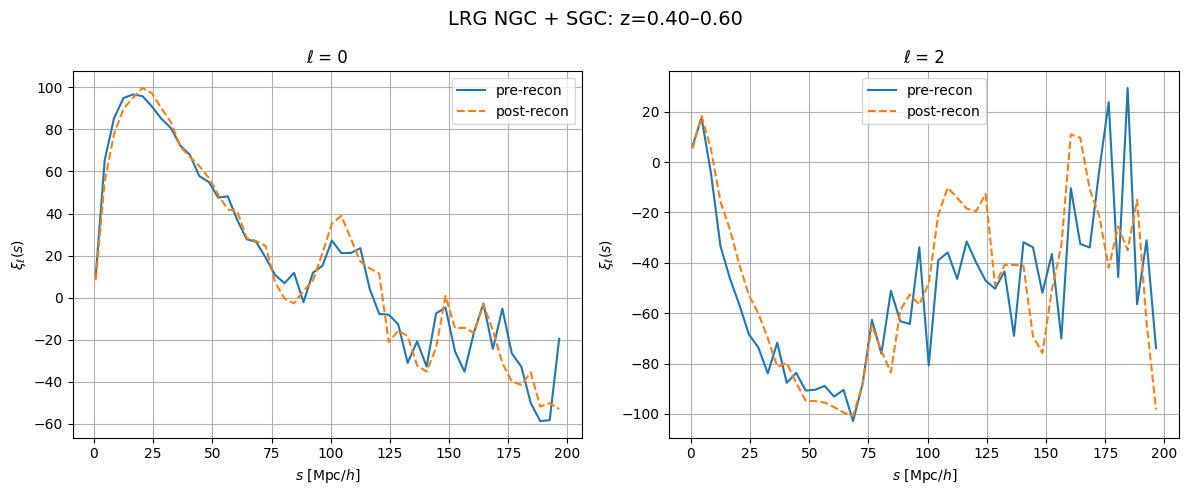

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True)
colors = {'pre': 'C0', 'post': 'C1'}
styles = {'pre': '-', 'post': '--'}

for i, ell in enumerate(ells):
    ax = axes[i]
    for recon in ['pre', 'post']:
        s = xiell[recon][label]['s'][::4]
        xi = xiell[recon][label][f'ell{ell}'][::4]
        ax.plot(s, s**2*xi, label=f'{recon}-recon', color=colors[recon], linestyle=styles[recon])
    ax.set_title(f'ℓ = {ell}')
    ax.set_xlabel(r'$s\ [\mathrm{Mpc}/h]$')
    ax.set_ylabel(r'$\xi_\ell(s)$')
    ax.grid(True)
    ax.legend()

plt.suptitle(f'LRG NGC + SGC: {label}', fontsize=14)
plt.tight_layout()
plt.show()